In [673]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data_file='N:\\TESE\\Bullwhip\\data\\input\\data_amplified.csv'


In [674]:
# data_input = pd.read_csv(data_file)
# data_input.index = pd.DatetimeIndex(data_input.index.values,
#                                freq=data_input.index.inferred_freq)

In [675]:
data_input = pd.read_csv(data_file)



def add_timeseries(array):
        # create dummy dates for the arima modules....
        dates = pd.date_range('1900-1-1', periods=len(array), freq='D')
        # add the dates and the data to a new dataframe
        ts = pd.DataFrame({'dates': dates, 'values': array})
        # set the dataframe index to be the dates column
        # print(ts["values"])
        ts["values"] = ts["values"].astype(int)
        return  ts.set_index('dates')  

data=add_timeseries(data_input["value"])
data.head()

,values
dates,
1900-01-01,10090
1900-01-02,10305
1900-01-03,10368
1900-01-04,10388
1900-01-05,10284


In [676]:

data.isna().sum()


values    0
dtype: int64

In [677]:
data.describe()

,values
count,5740.000000
mean,12049.055923
std,1599.494149
min,8252.000000
25%,11134.750000
50%,12080.000000
75%,13206.250000
max,15990.000000


<AxesSubplot:xlabel='dates'>

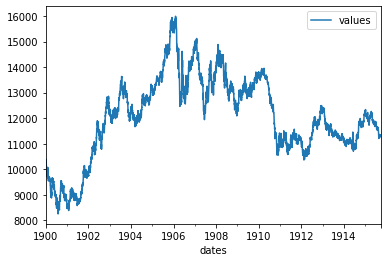

In [678]:
data.plot()


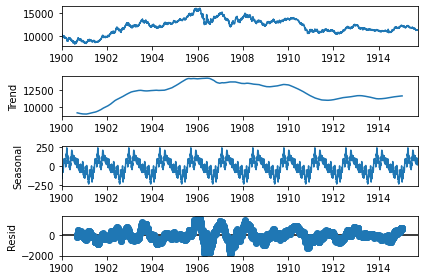

In [679]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(data, model="additive",period=500)
decompose_data.plot();

<AxesSubplot:xlabel='dates'>

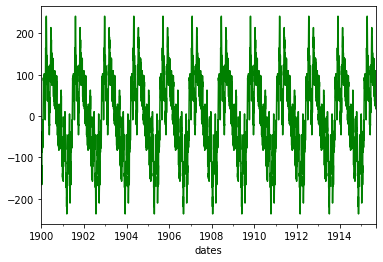

In [680]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

In [681]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.9653113958278652
2. P-Value :  0.30198681956009943
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 5724
5. Critical Values :
	 1% :  -3.43149294811129
	 5% :  -2.8620450735350436
	 10% :  -2.5670388488366074


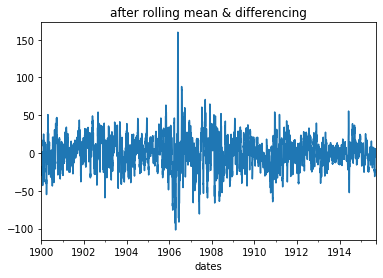

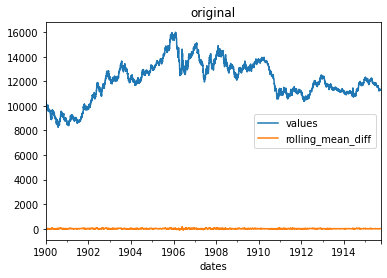

In [682]:
rolling_mean = data.rolling(window = 12).mean()
data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
data['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
data.plot(title='original');

In [683]:
dftest = adfuller(data['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -12.470565478242529
2. P-Value :  3.251910504111877e-23
3. Num Of Lags :  34
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 5693
5. Critical Values :
	 1% :  -3.431499174597602
	 5% :  -2.862047824513573
	 10% :  -2.5670403132641777


In [684]:
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.arima.model.ARIMA import ARIMA
model=ARIMA(data['values'],order=(2,2,2))
history=model.fit()

C:\Users\Tiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Tiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Tiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [685]:
history.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 values   No. Observations:                 5740
Model:                 ARIMA(2, 2, 2)   Log Likelihood              -32671.511
Date:                Thu, 27 Jan 2022   AIC                          65353.022
Time:                        01:10:42   BIC                          65386.296
Sample:                    01-01-1900   HQIC                         65364.603
                         - 09-19-1915                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9936      0.027    -37.227      0.000      -1.046      -0.941
ar.L2         -0.0054      0.008     -0.656      0.512      -0.021       0.011
ma.L1         -0.0103      0.027     -0.376      0.707      -0.064       0.043
ma.L2         -0.9897      0.027    -36.109      0.000      -1.043      -0.936
sigma2      5154.0337     72.397     71.191      0.000    5012.138    5295.930
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4745.58
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [686]:
model=ARIMA(data['rolling_mean_diff'].dropna(),order=(5,1,5))
model_fit=model.fit()


C:\Users\Tiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Tiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Tiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Tiago\AppData\Local\Packages\PythonSoftwareFounda

,values,forecast
count,5740.000000,5638.000000
mean,12049.055923,5.662876
std,1599.494149,0.209366
min,8252.000000,-3.481042
25%,11134.750000,5.665934
50%,12080.000000,5.665934
75%,13206.250000,5.665934
max,15990.000000,9.870855


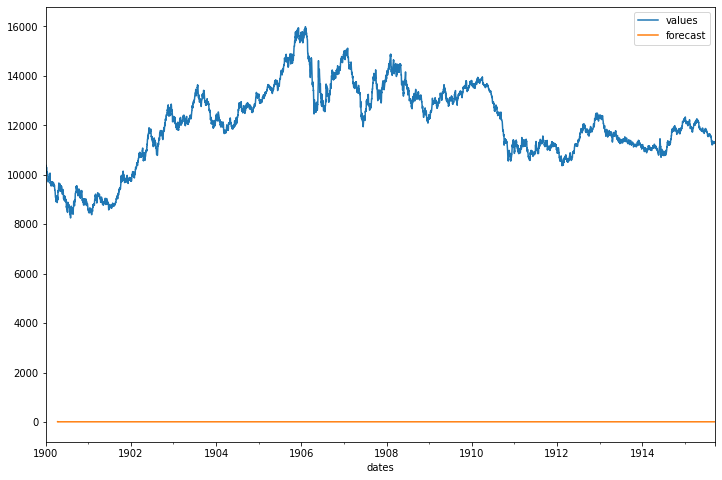

In [687]:
data['forecast']=model_fit.predict(start=90,dynamic=True)
data[['values','forecast']].plot(figsize=(12,8))
data[['values','forecast']].describe()

In [688]:
# SAMIRAX

In [689]:
import statsmodels.api as sm


In [690]:
model=sm.tsa.statespace.SARIMAX(data['values'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Tiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Tiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


,forecast
count,5740.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


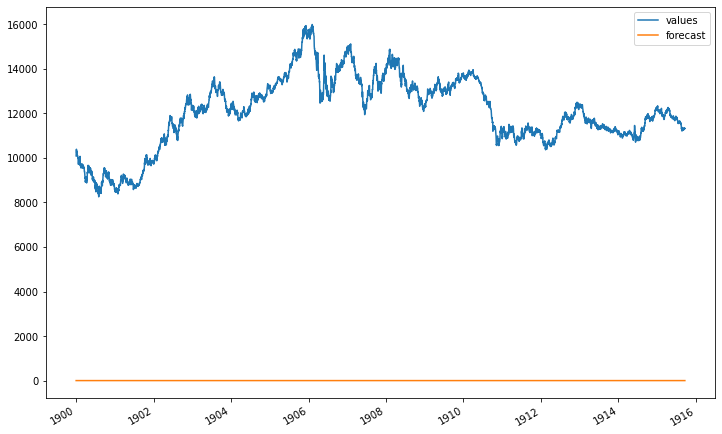

In [696]:
data['forecast']=results.predict(dynamic=True)
data[['values','forecast']].plot(figsize=(12,8))
data[['values','forecast']].describe()

In [692]:
from pandas.tseries.offsets import DateOffset
pred_date=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [693]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=data.columns)
pred_date

,values,rolling_mean_diff,forecast
1915-10-19,NaN,NaN,NaN
1915-11-19,NaN,NaN,NaN
1915-12-19,NaN,NaN,NaN
1916-01-19,NaN,NaN,NaN
1916-02-19,NaN,NaN,NaN
1916-03-19,NaN,NaN,NaN
1916-04-19,NaN,NaN,NaN
1916-05-19,NaN,NaN,NaN
1916-06-19,NaN,NaN,NaN
1916-07-19,NaN,NaN,NaN


In [694]:
data=pd.concat([data,pred_date])
data

,values,rolling_mean_diff,forecast
1900-01-01,10090,NaN,0.0
1900-01-02,10305,NaN,0.0
1900-01-03,10368,NaN,0.0
1900-01-04,10388,NaN,0.0
1900-01-05,10284,NaN,0.0
...,...,...,...
1917-04-19,NaN,NaN,NaN
1917-05-19,NaN,NaN,NaN
1917-06-19,NaN,NaN,NaN
1917-07-19,NaN,NaN,NaN


<AxesSubplot:>

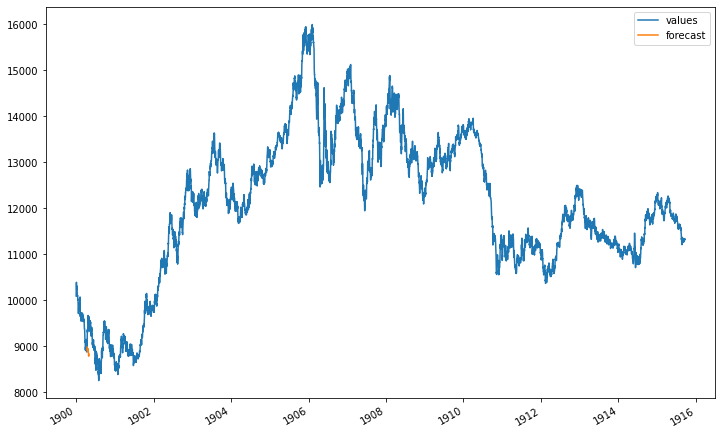

In [695]:
data['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
data[['values', 'forecast']].plot(figsize=(12, 8))